In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load logins json file
logins = pd.read_json('/Users/Jack1/Desktop/Springboard Goodies/ultimate_challenge 2/logins.json')

## Prework - Exploratory data analysis ##

In [3]:
# Check for na values
logins.isna().sum()

login_time    0
dtype: int64

In [4]:
# Check the data type(s) of dataframe
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [5]:
# Check the shape of dataframe
logins.shape

(93142, 1)

## Part 1 ‐ Exploratory data analysis ##

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15 minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [6]:
print(logins)
print('\n')
print(logins.info())
print('\n')
print(logins.describe())

               login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


                          login_time
count                          93142
mean   1970-02-26 19:09:39.779648278
min              1970-01-01 20:12:16
25%       1970-02-04 10:37:19.750000
50%       1970-03-01 06:33:05.500000
75%       1970-03-22 04:01:10.750000
max              1970-04-13 18:57:38


In [7]:
# Set index to datetimeindex to be able to resample
logins = logins.set_index('login_time')

# Aggregate the login counts based on 15 minute time intervals
logins['login_count'] = 0
logins = logins.resample('15min').count()

print('Total Number of Login Observations:', logins['login_count'].sum())
print('Number of 15 Minunte Intervals:', len(logins))
logins.head()

Total Number of Login Observations: 93142
Number of 15 Minunte Intervals: 9788


,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
print('The min login count is:', min(logins['login_count']))
print('The max login count is:', max(logins['login_count']))

The min login count is: 0
The max login count is: 73


Great! Now let's visualize this to further understand the data

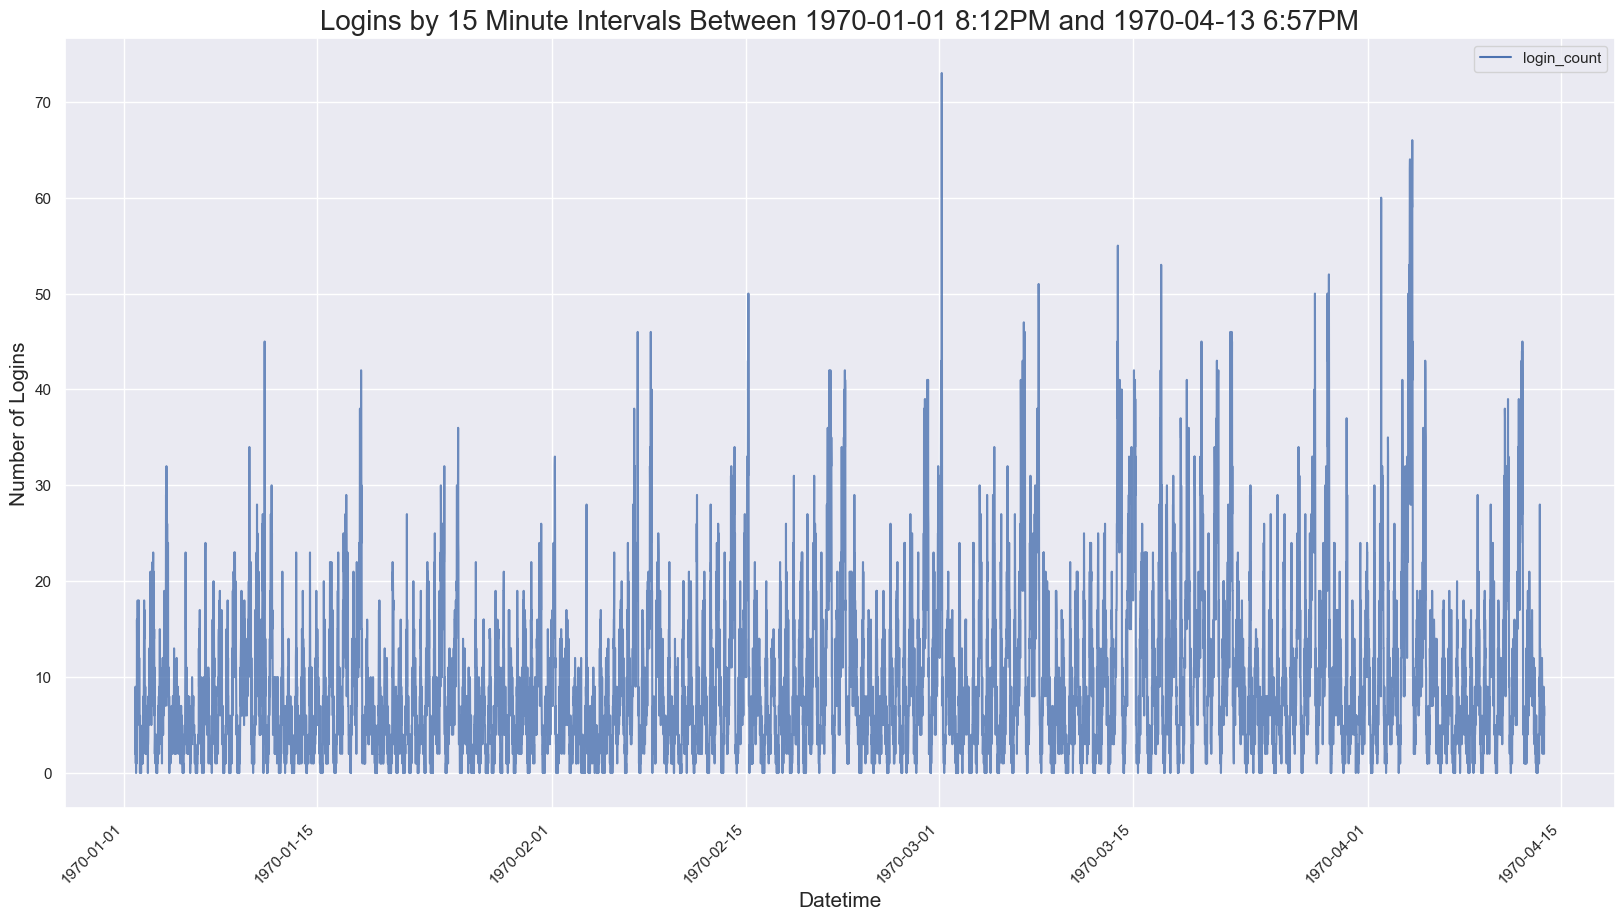

In [9]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(data=logins, alpha=0.8)
plt.title('Logins by 15 Minute Intervals Between 1970-01-01 8:12PM and 1970-04-13 6:57PM', fontsize=20)
plt.xlabel('Datetime', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Logins', fontsize=15)
plt.show()

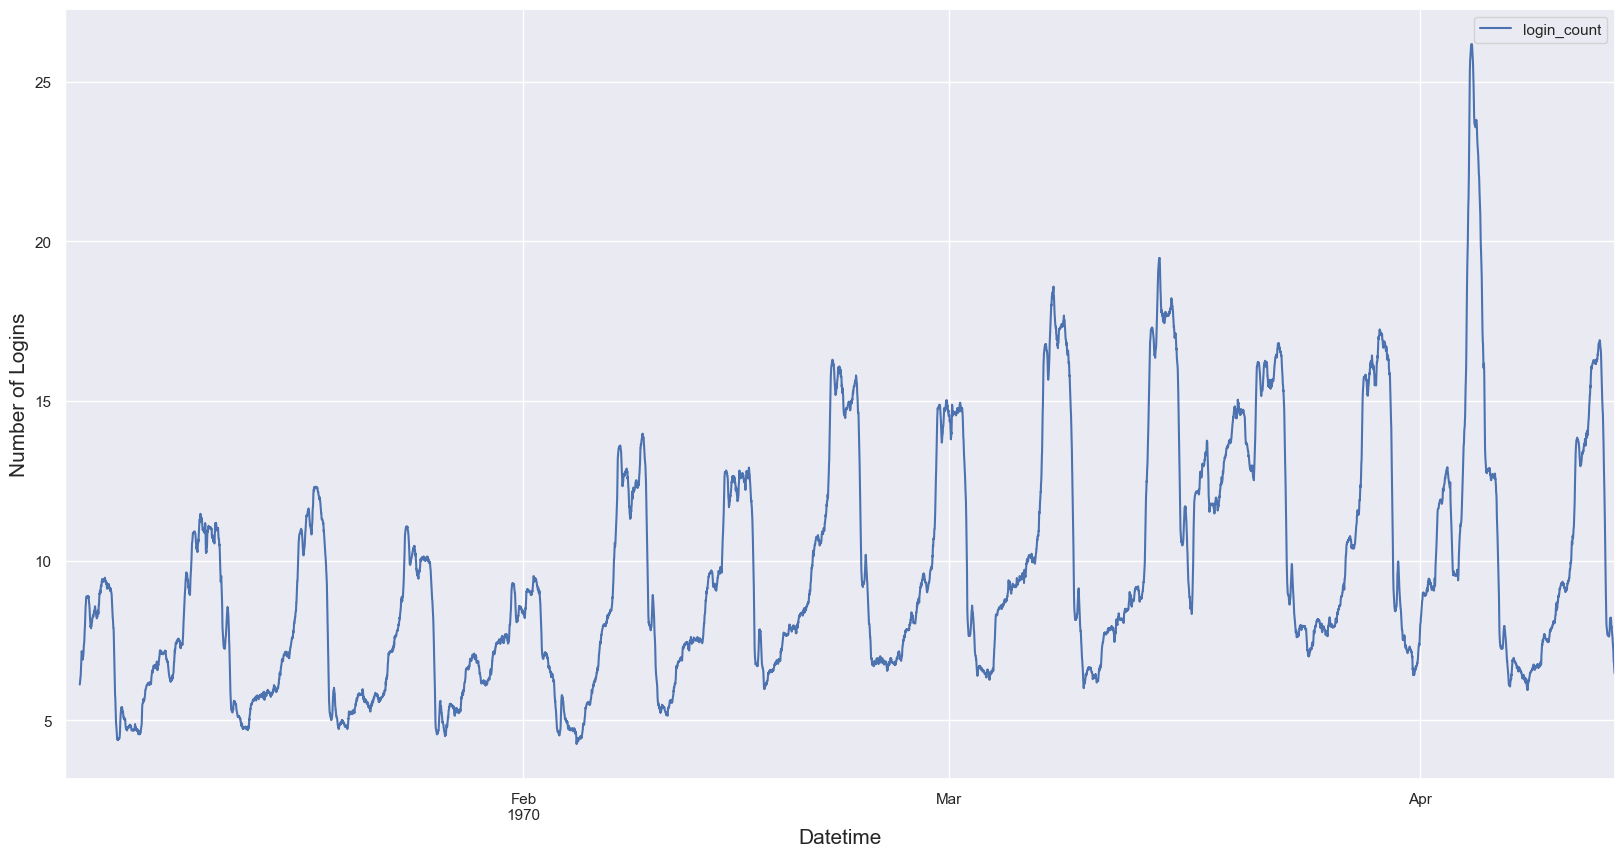

In [10]:
# Smoothing over a 24 hour period to get a better visual than above
logins.rolling(window=96).mean().plot(figsize=(20,10), grid=True)
plt.xlabel('Datetime', fontsize=15)
plt.ylabel('Number of Logins', fontsize=15)
plt.show()

Initial Takeaways: The minimum number of logins is 0 while the maximum is 73. Do logins rise or fall over the weekends?

In [11]:
# Build out logins dataframe to show day, month, day_of_week to better analyze + visualize
logins['month'] = logins.index.month
logins['day'] = logins.index.day
logins['day_of_week'] = logins.index.day_of_week # Where Monday = 0, Sunday = 6
logins.sample(20)

,login_count,month,day,day_of_week
login_time,,,,
1970-03-25 02:15:00,11,3,25,2
1970-01-22 16:15:00,3,1,22,3
1970-03-11 18:30:00,8,3,11,2
1970-04-05 12:45:00,17,4,5,6
1970-03-23 21:30:00,10,3,23,0
1970-04-06 21:15:00,10,4,6,0
1970-03-08 21:45:00,19,3,8,6
1970-02-03 09:45:00,5,2,3,1
1970-03-22 06:15:00,12,3,22,6


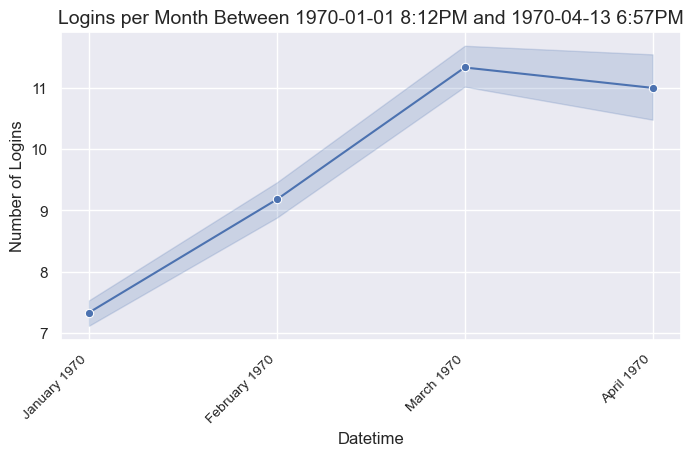

In [12]:
# Visualize by month
sns.set(rc={'figure.figsize':(8, 4)})
sns.lineplot(data=logins, x='month', y='login_count', markers=True, marker='o')
plt.title('Logins per Month Between 1970-01-01 8:12PM and 1970-04-13 6:57PM', fontsize=14)
ax = plt.gca()
plt.xlabel('Datetime', fontsize=12)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['January 1970', 'February 1970', 'March 1970', 'April 1970'], fontsize=10) 
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Logins', fontsize=12)
plt.show()

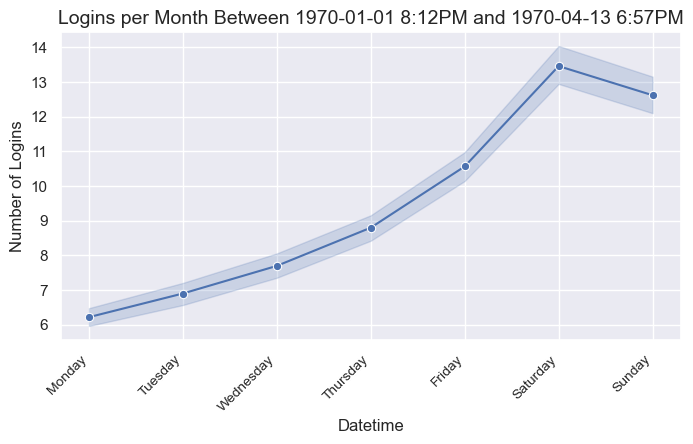

In [13]:
# Visualize by day of a week
sns.set(rc={'figure.figsize':(8, 4)})
sns.lineplot(data=logins, x='day_of_week', y='login_count', markers=True, marker='o')
plt.title('Logins per Month Between 1970-01-01 8:12PM and 1970-04-13 6:57PM', fontsize=14)
ax = plt.gca()
plt.xlabel('Datetime', fontsize=12)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=10) 
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Logins', fontsize=12)
plt.show()

Ah-ha! We can confirm that logins rise over the weekends! This is a key finding. In particular, Saturdays are the most popular login day.

## Part 2 ‐ Experiment and metrics design ##

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1) While essentially we want to further understand the number of driver partner crossings between both cities, I would choose to conduct a test program where the drivers between both cities are split into two groups: Group A drivers are reimbursed, Group B drivers are not-reimbursed. The test would run for a month in order to gather enough data but not too much data. It also is important to understand each city's drivers patterns... so looking at the ratio of jobs conducted in each city to undersatnd how they spend their time is valuable to understand.

2) A/B testing

## Part 3 ‐ Predictive modeling ##

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [14]:
# Load ultimate_data_challenge json file
challenge = pd.read_json('/Users/Jack1/Desktop/Springboard Goodies/ultimate_challenge 2/ultimate_data_challenge.json')
challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [15]:
# Check for na values
challenge.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

There are na values in the "avg_rating_of_driver" and "phone" fields. For the former field, the impacted rows could be dropped or the values replaced with say the mean value of the field. Filling it with the mean value makes the most sense. For the latter field, it is not a value added field for this excerise, so the na values will be replaced with "other."

In [16]:
# Replace na values in the "avg_rating_of_driver" field with mean values of field
challenge['avg_rating_of_driver'] = challenge['avg_rating_of_driver']. \
                                    fillna(challenge['avg_rating_of_driver'].mean())

# Replace na values in the "avg_rating_by_driver" field with mean values of field
challenge['avg_rating_by_driver'] = challenge['avg_rating_by_driver']. \
                                    fillna(challenge['avg_rating_by_driver'].mean())

# Replace na values in the "phone" field with value of "other."
challenge['phone'] = challenge['phone'].fillna('other')

In [17]:
# Check for na values in the "avg_rating_of_driver" field
challenge.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [18]:
# Check the data type(s) of dataframe
challenge.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [19]:
# Convert "signup_date" and "last_trip_date" fields to date format
challenge['signup_date'] = pd.to_datetime(challenge['signup_date'])
challenge['last_trip_date'] = pd.to_datetime(challenge['last_trip_date'])

In [20]:
# Convert "signup_date" and "last_trip_date" fields to date format
#challenge['signup_date'] = challenge['signup_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
#challenge['last_trip_date'] = challenge['last_trip_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [21]:
# Check the data type(s) of dataframe
challenge.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [22]:
# Check shape of the dataframe
challenge.shape

(50000, 12)

In [23]:
print(challenge)
print('\n')
print(challenge.info())
print('\n')
print(challenge.describe())

                 city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                  4.700000       1.10     2014-06-17   iPhone       15.4   
1                  5.000000       1.00     2014-05-05  Android        0.0   
2                  4.300000       1.

### 3.1 - Calculate Rider Rentention ###

In [24]:
# Show the oldest and most recent signups tied to the "last_trip_date" field
challenge['last_trip_date'].describe()

count                            50000
mean     2014-04-19 08:02:04.992000256
min                2014-01-01 00:00:00
25%                2014-02-14 00:00:00
50%                2014-05-08 00:00:00
75%                2014-06-18 00:00:00
max                2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [25]:
challenge.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [26]:
# Total number of riders
total_riders = len(challenge)
print('The number of drivers in the 6 month window is:', total_riders)

# Calculate active riders
active_riders = (challenge['last_trip_date'] >= '2014-06-01').sum()
print('The number of active riders in the final month of June is:', active_riders)

# % of riders retained
riders_retained = active_riders / total_riders
print('The percentage of riders retained over the period is:', round(riders_retained, 2)*100)

# Create "riders_retained" field
challenge['retained'] = (challenge.last_trip_date >= '2014-06-01')*1

The number of drivers in the 6 month window is: 50000
The number of active riders in the final month of June is: 18804
The percentage of riders retained over the period is: 38.0


In [27]:
challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


### 3.2 - Build Predictive Model ###

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [29]:
# Convert "signup_date" field to an integer data type. Indicate the number of days beyond January 01, 2014
challenge['signup_date'] = challenge['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100

# Convert "last_trip_date" field to indicate the number of days beyond January 01, 2014
challenge['last_trip_date'] = (challenge['last_trip_date'] - min(challenge['last_trip_date'])).dt.days + 1

In [30]:
# Dummy encoding - transform the categorical variable into a set of binary variables
df = pd.get_dummies(challenge, columns=['city', 'phone'])

#number of days until driver signed up
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int)

# Split the data into features (X) and target (y)
X = df.drop('retained', axis=1)
y = df['retained']

# Split the data into training and test sets. 30% testing, 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()

# Transform features such that its distribution will have a mean value of 0 and standard deviation of 1.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
print('The mean is:', np.mean(X_train_scaled), '... which equates to zero')
print('The standard deviation is:', np.std(X_train_scaled))

The mean is: 9.441336601412332e-17 ... which equates to zero
The standard deviation is: 0.9682458365518541


In [32]:
# Check the shape of the test/train split
print(f'X_train:{X_train.shape}\ty_train:{y_train.shape}')
print(f'X_test: {X_test.shape}\ty_test: {y_test.shape}')

X_train:(35000, 16)	y_train:(35000,)
X_test: (15000, 16)	y_test: (15000,)


In [33]:
# Create Decision Tree Classifer model
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = dtc.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [34]:
# Create Random Forest Classifer model
rfc = RandomForestClassifier()

# Train Random Forest Classifer
rfc = rfc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = rfc.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [35]:
# Create KNeighbors Classifer model
lr = LogisticRegression()

# Train KNeighbors Classifer
lr = lr.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = lr.predict(X_test)

print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.6253
Precision: 0.0
Recall: 0.0


/Users/Jack1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Create KNeighbors Classifer model
gnb = GaussianNB()

# Train KNeighbors Classifer
gnb = gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', round(metrics.precision_score(y_test, y_pred), 4))
print('Recall:', round(metrics.recall_score(y_test, y_pred), 4))

Accuracy: 0.9523
Precision: 0.9585
Recall: 0.9123
